<font color='blue'> **09 __________________________________ A_ Declustering_b)** </font> 

In [ ]:
import os; import sys ; from pathlib import Path  ;_R=Path("_R")  ;_R.mkdir(exist_ok=True); TA=Path("_R/08_GeostatsPy_kriging_")  ;TA.mkdir(exist_ok=True) #; os.chdir(TA)
import numpy as np    ; import pandas as pd ; import matplotlib.pyplot as plt   # sys.path.append('E:/15_REPOS/05_Working/11e_Kriging_Beta/Guy') ; from g1 import #def
import geostatspy.GSLIB as GSLIB   ; import geostatspy.geostats as geostats     ; import geostatspy ; cmap = plt.cm.inferno ; plt.rc('axes', axisbelow=True) ; ignore_warnings = True
if ignore_warnings == True:                                   
    import warnings ;     warnings.filterwarnings('ignore')
from tqdm import tqdm  ; from functools import partialmethod ; tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) ; import matplotlib.ticker as ticker ; from scipy import stats  ; from statsmodels.stats.weightstats import DescrStatsW
def add_grid():                                          
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) 
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) 
REF1 = Path('E:/15_REPOS/02_Beta-Me/data/Krig/GeostatsPy')  # df.to_csv(REF1/'sample_data_biased.csv')  

In [2]:
df = pd.read_csv(REF1/'spatial_nonlinear_MV_facies_v5_sand_only.csv')  ; df = df.drop(columns=['Unnamed: 0.1'], axis=1) ; df = df.rename(columns={'Porosity':'Por'}) 
PD=pd.DataFrame(df['Por'].describe()) ; PD.T

,count,mean,std,min,25%,50%,75%,max
Por,270.0,18.381488,4.262747,9.224354,14.866536,18.629858,21.723391,27.594892


In [3]:
ncell = 100; cmin = 10; cmax = 20000; noff = 10; iminmax = 1 
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Por',iminmax = iminmax,noff = noff,ncell = ncell,cmin = cmin,cmax = cmax)  ; df['Wts'] = wts  # weights  # df.head()                                                     

There are 270 data with:
   mean of      18.381488145500636 
   min and max  9.224354317579358 and 27.594891730048342
   standard dev 4.2548458306479775 


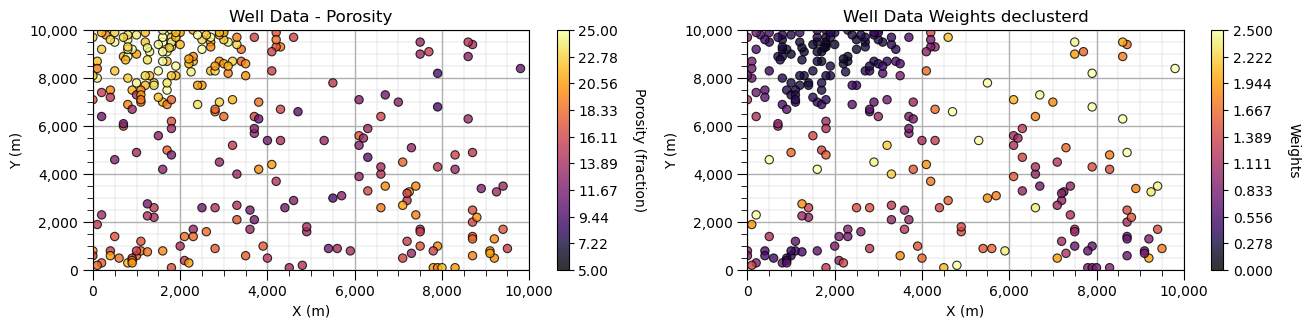

In [4]:
fig = plt.figure(figsize=(12,2))        ; xmin=0.0 ;xmax=10000.0   ;ymin=0.0 ;ymax=10000.0  ;pormin=5 ;pormax=25   ;formatter = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')

plt.subplot(121)    ; GSLIB.locmap_st(df,'X','Y','Por',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity'         ,'X (m)','Y (m)','Porosity (fraction)',cmap) ; add_grid() 
plt.gca().xaxis.set_major_formatter(formatter); plt.gca().yaxis.set_major_formatter(formatter) 
plt.subplot(122)    ; GSLIB.locmap_st(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.0    ,2.5   ,'Well Data Weights declusterd','X (m)','Y (m)','Weights',cmap) ; add_grid()
plt.gca().xaxis.set_major_formatter(formatter); plt.gca().yaxis.set_major_formatter(formatter) ;plt.subplots_adjust(left=0.0,bottom=0.0,right=1.0,top=1.2,wspace=0.2,hspace=0.2);plt.show()

Porosity naive mean is 18.381. _____Porosity declustered mean is 16.059. ______Correction of 0.1264.


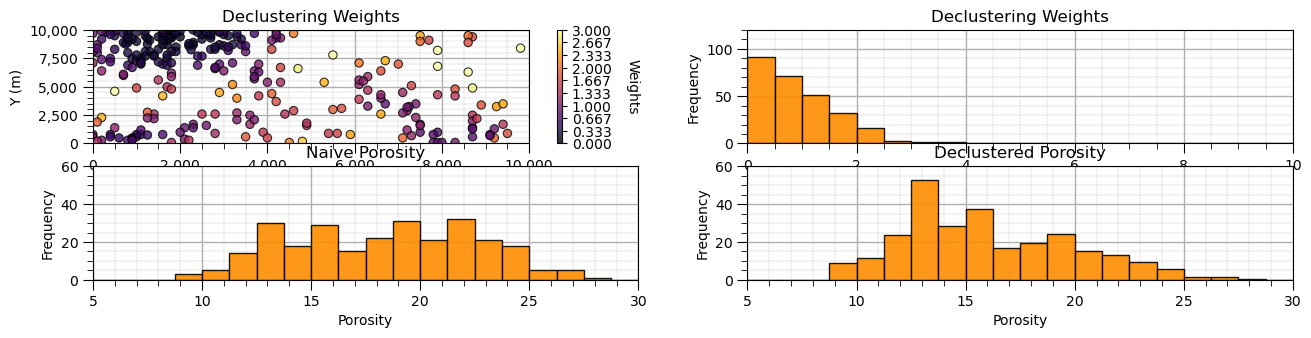


Summary | declustering weights: DescribeResult(nobs=270, minmax=(0.20904854434290107, 5.060379981544719), mean=1.0000000000000009, variance=0.5948104935709296, skewness=1.7216051448854657, kurtosis=4.291384441783515)


In [5]:
por_mean = np.average(df['Por'].values)   ; por_dmean = np.average(df['Por'].values,weights=df['Wts'].values)       ; cor = (por_mean-por_dmean)/por_mean
print('Porosity naive mean is ' + str(round(por_mean,3))+'.','_____Porosity declustered mean is ' + str(round(por_dmean,3))+'.', '______Correction of ' + str(round(cor,4)) +'.') ;  

fig = plt.figure(figsize=(6,1))             
plt.subplot(221) ; GSLIB.locmap_st(df,'X','Y','Wts',xmin,xmax,ymin,ymax,0.0,3.0,'Declustering Weights','X (m)','Y (m)','Weights',cmap)    ; add_grid(); plt.gca().xaxis.set_major_formatter(formatter); plt.gca().yaxis.set_major_formatter(formatter)
plt.subplot(222) ; GSLIB.hist_st(df['Wts'],0,10,log=False,cumul=False,bins=20,weights=None,xlabel="Weights",title="Declustering Weights") ; plt.ylim(0.0,120); add_grid()
plt.subplot(223) ; GSLIB.hist_st(df['Por'],5,30,log=False,cumul=False,bins=20,weights=None,xlabel="Porosity",title="Naive Porosity")      ; plt.ylim(0.0,60); add_grid()
plt.subplot(224) ; GSLIB.hist_st(df['Por'],5,30,log=False,cumul=False,bins=20,weights=df['Wts'],xlabel="Porosity",title="Declustered Porosity") ; plt.ylim(0.0,60); add_grid()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.5, wspace=0.2, hspace=0.2) ; plt.show() ; print('\nSummary | declustering weights:', stats.describe(wts))

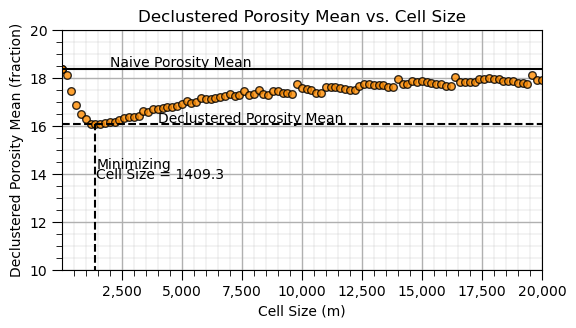

In [6]:
fig = plt.figure(figsize=(4,2))     ; csize_min = cell_sizes[np.argmin(dmeans)] ; smin = 10; smax = 20
plt.subplot(111) ; plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.8, edgecolors = "black", facecolors = 'darkorange')
plt.xlabel('Cell Size (m)') ; plt.ylabel('Declustered Porosity Mean (fraction)') ; plt.title('Declustered Porosity Mean vs. Cell Size')
plt.plot([cmin,cmax],[por_mean,por_mean],color = 'black') ; plt.plot([cmin,cmax],[por_dmean,por_dmean],color = 'black',ls='--')
plt.plot([csize_min,csize_min],[ymin,por_dmean],color = 'black',linestyle='dashed') ; plt.text(0.1*(cmax - cmin) + cmin, por_mean+0.1, r'Naive Porosity Mean')
plt.text(0.2*(cmax - cmin) + cmin, por_dmean+0.1, r'Declustered Porosity Mean') ; plt.text(csize_min+30,0.70 * (por_dmean - smin) + smin, r'Minimizing')
plt.text(csize_min+30,0.63 * (por_dmean - smin) + smin, r'Cell Size = ' + str(np.round(csize_min,1))) ; plt.ylim([smin,smax]); plt.xlim(cmin,cmax)
add_grid(); plt.gca().xaxis.set_major_formatter(formatter) ; plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2) ; plt.show()

In [7]:
weighted_data = DescrStatsW(df['Por'].values, weights=df['Wts'], ddof=0)
print('Declustered, Weighted Statistics:')                           ; print('  Mean: ' + str(round(weighted_data.mean,3)))
print('  Standard Deviation: ' + str(round(weighted_data.std,3)))    ; print('  Variance: ' + str(round(weighted_data.var,5)))

Declustered, Weighted Statistics:
  Mean: 16.059
  Standard Deviation: 3.862
  Variance: 14.91566
